AMD GPU specs: 

- **Peak FP32 Performance:** 163.4 TFLOP/s = **163,400 GFLOP/s**
- **Peak Memory Bandwidth:** 5.3 TB/s = **5,300 GB/s**

**Ridge Point:** 
$$\frac{163,400 \text{ GFLOP/s}}{5,300 \text{ GB/s}} = 30.83 \text{ FLOP/byte}$$

**HS kernel: AI = $1.32$ FLOP/byte**

Since $1.32 < 30.83$, the kernel is **memory-bound**.

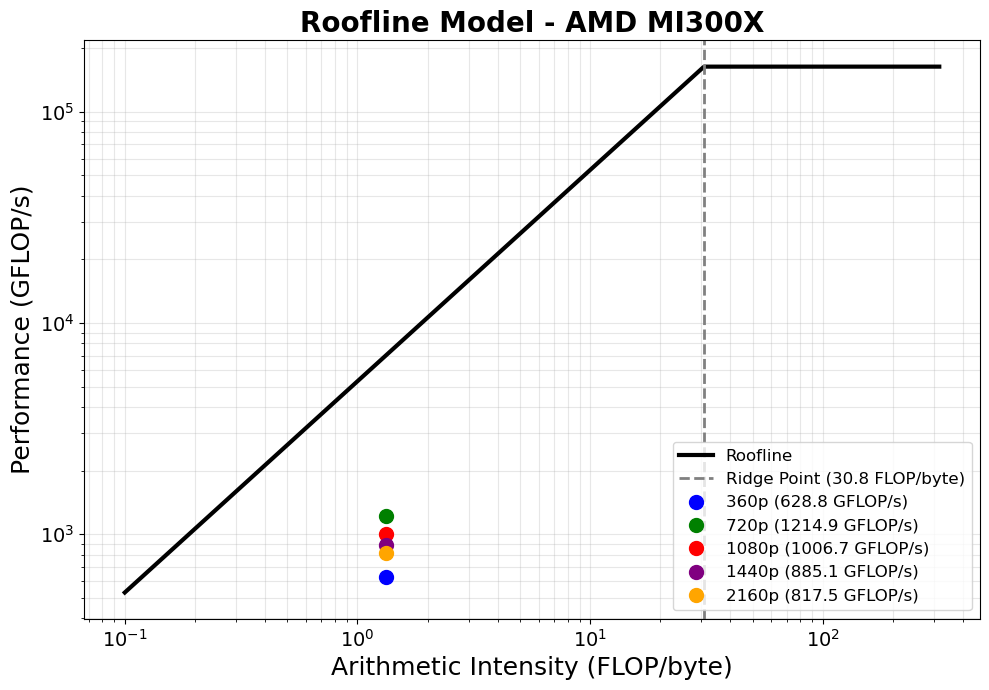

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# GPU specs
peak_compute = 163400  # GFLOP/s
peak_bandwidth = 5300  # GB/s
ridge_point = peak_compute / peak_bandwidth

# Generate roofline
ai = np.logspace(-1, 2.5, 500)
bandwidth_bound = peak_bandwidth * ai
compute_bound = np.full_like(ai, peak_compute)
roofline = np.minimum(bandwidth_bound, compute_bound)

# Actual measured performance
hs_ai = 1.32  # FLOP/byte

# Multi-resolution measurements
resolutions = ['360p', '720p', '1080p', '1440p', '2160p']
gflops_values = [628.8, 1214.9, 1006.7, 885.1, 817.5]
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plot
plt.figure(figsize=(10, 7))
plt.loglog(ai, roofline, 'k-', linewidth=3, label='Roofline')
plt.axvline(ridge_point, color='gray', linestyle='--', linewidth=2, 
            label=f'Ridge Point ({ridge_point:.1f} FLOP/byte)')

# Plot multi-resolution points
for res, gflops, color in zip(resolutions, gflops_values, colors):
    plt.plot(hs_ai, gflops, 'o', color=color, markersize=10, 
             label=f'{res} ({gflops:.1f} GFLOP/s)', zorder=5)

plt.xlabel('Arithmetic Intensity (FLOP/byte)', fontsize=18)
plt.ylabel('Performance (GFLOP/s)', fontsize=18)
plt.title('Roofline Model - AMD MI300X', fontsize=20, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.grid(True, which='both', alpha=0.3)
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.savefig('roofline.png', dpi=300)
plt.show()